In [21]:
%config Completer.use_jedi = False
%matplotlib inline

In [22]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [23]:
recordsDF = pd.read_csv("records.csv")
# recordsDF = pd.read_csv("records.csv", header=[0,1])
recordsDF["datetime"] = pd.to_datetime(recordsDF["datetime"])

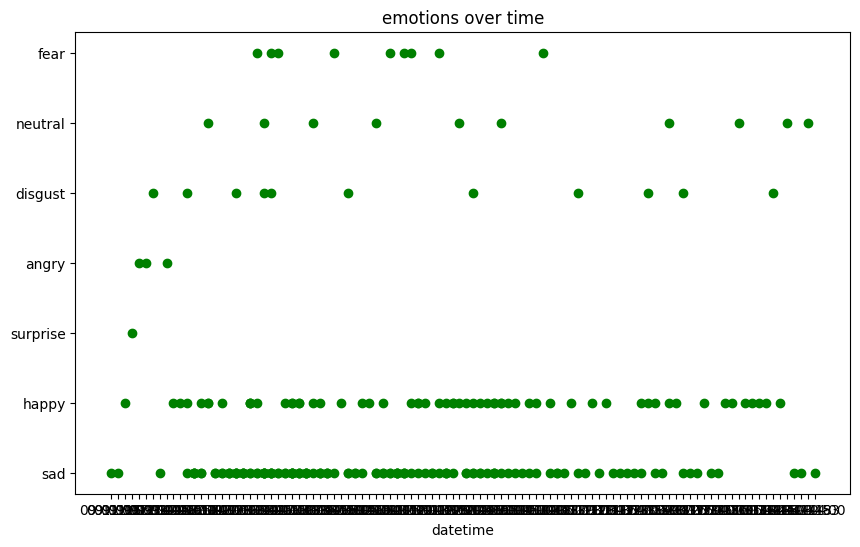

In [24]:
figure, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('datetime')
ax.set_title('emotions over time')
ax.scatter(recordsDF['datetime'].map(lambda dt: dt.strftime('%H-%m-%S')), recordsDF['emotion'], color='g')

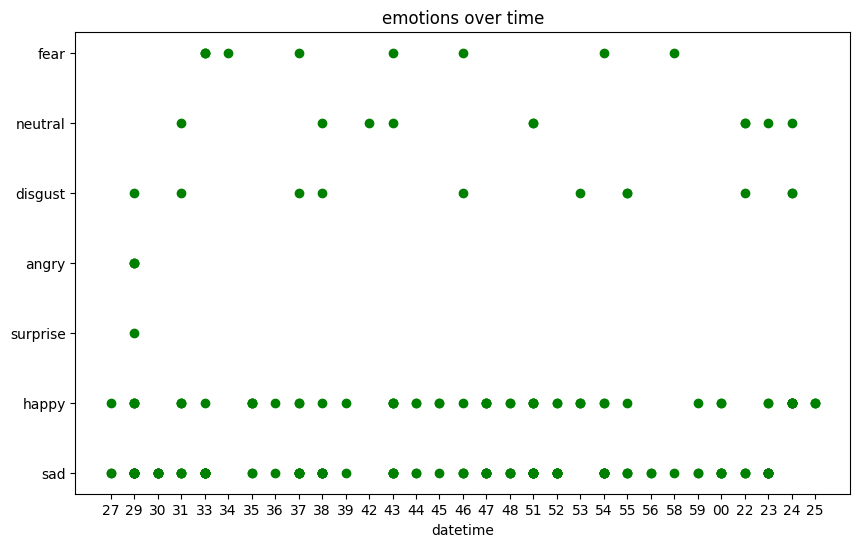

In [25]:
figure, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('datetime')
ax.set_title('emotions over time')
ax.scatter(recordsDF['datetime'].map(lambda dt: dt.strftime('%M')), recordsDF['emotion'], color='g')

In [26]:

recordsDF["datetime"] = pd.to_datetime(recordsDF["datetime"])
recordsDF['datetime'] = recordsDF['datetime'].dt.strftime("%H:%M")
happyDF = recordsDF[recordsDF["emotion"]=="happy"]
happyDF

,emotion,datetime
2,happy,09:27
9,happy,09:29
10,happy,09:29
11,happy,10:29
14,happy,10:29
...,...,...
213,happy,13:24
214,happy,13:24
215,happy,13:25
216,happy,13:25


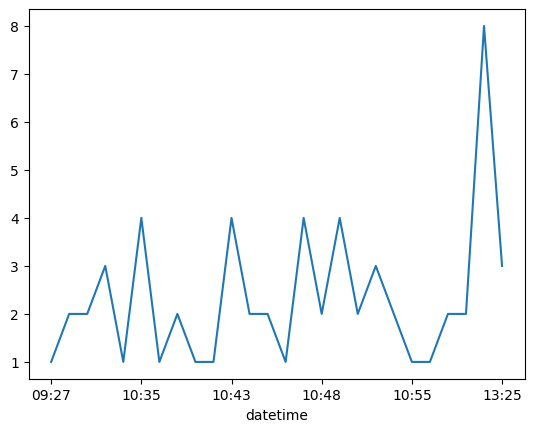

datetime
09:27    1
09:29    2
10:29    2
10:31    3
10:33    1
10:35    4
10:36    1
10:37    2
10:38    1
10:39    1
10:43    4
10:44    2
10:45    2
10:46    1
10:47    4
10:48    2
10:51    4
10:52    2
10:53    3
10:54    2
10:55    1
10:59    1
11:00    2
13:23    2
13:24    8
13:25    3
Name: emotion, dtype: int64

In [27]:
groupedTime = happyDF.groupby('datetime')

groupedTime.head()
happyCounts = groupedTime["emotion"].count()

happyCounts.plot()
plt.show()
happyCounts

In [28]:
sadDF = recordsDF[recordsDF["emotion"]=="sad"]
sadDF

,emotion,datetime
0,sad,09:27
1,sad,09:27
7,sad,09:29
12,sad,10:29
13,sad,10:29
...,...,...
202,sad,13:23
203,sad,13:23
219,sad,14:22
220,sad,14:22


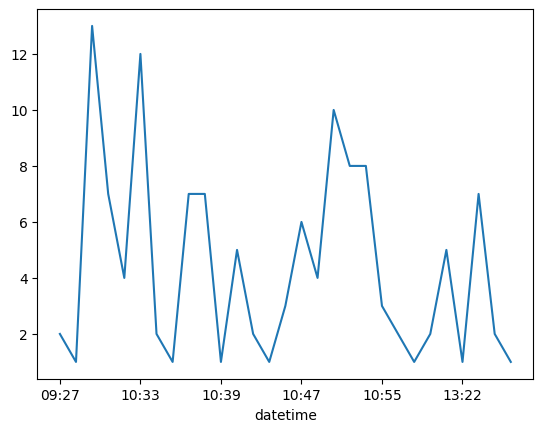

datetime
09:27     2
09:29     1
10:29    13
10:30     7
10:31     4
10:33    12
10:35     2
10:36     1
10:37     7
10:38     7
10:39     1
10:43     5
10:44     2
10:45     1
10:46     3
10:47     6
10:48     4
10:51    10
10:52     8
10:54     8
10:55     3
10:56     2
10:58     1
10:59     2
11:00     5
13:22     1
13:23     7
14:22     2
14:23     1
Name: emotion, dtype: int64


In [29]:
groupedTime = sadDF.groupby('datetime')

groupedTime.head()
sadCounts = groupedTime["emotion"].count()

sadCounts.plot()
plt.show()
print(sadCounts)

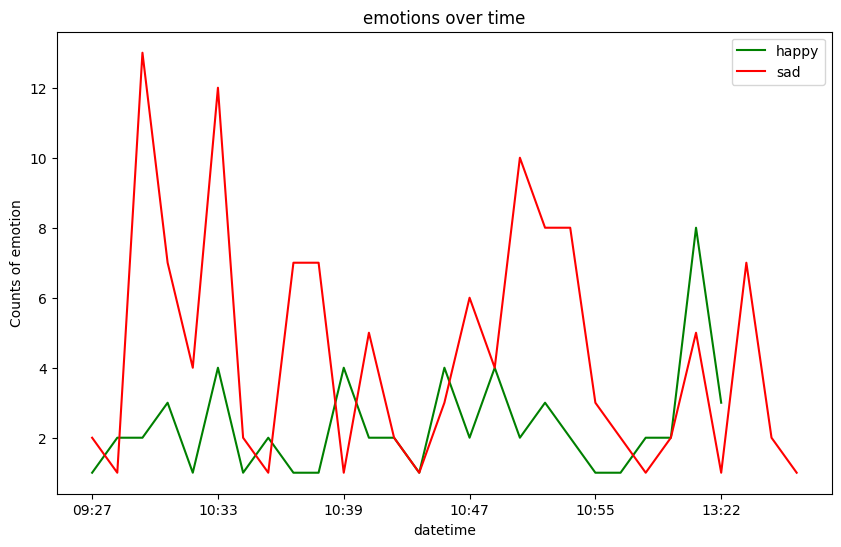

In [30]:
figure, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('datetime')
ax.set_ylabel('Counts of emotion')
ax.set_title('emotions over time')


happyCounts.plot(label="happy", color='g')
sadCounts.plot(label="sad", color='r')
plt.legend()

No handles with labels found to put in legend.


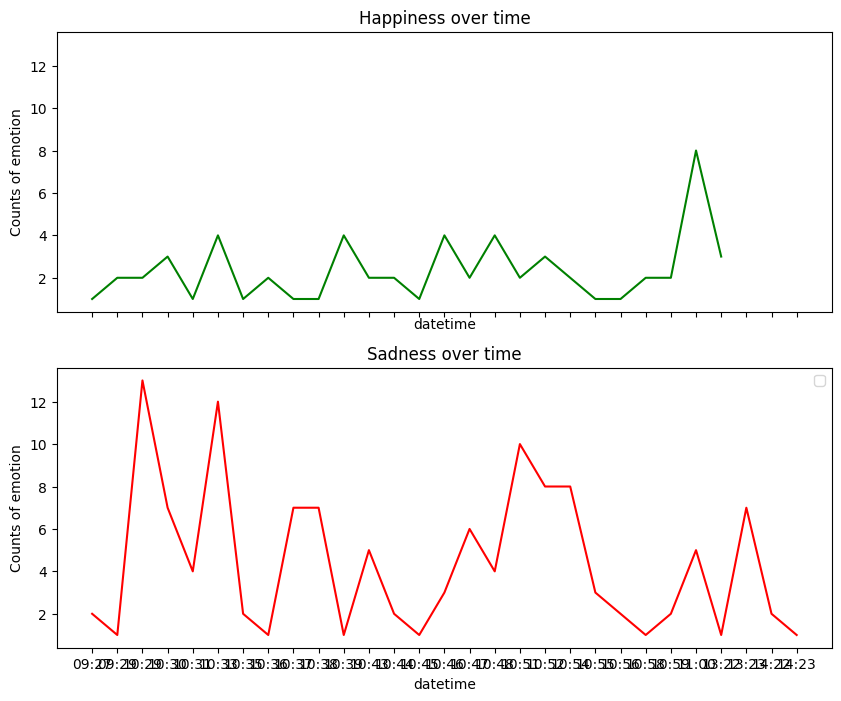

In [31]:
figure, (ax0, ax1) = plt.subplots(nrows=2,
                                  ncols=1,
                                  figsize=(10,8),
                                  sharex=True,
                                  sharey=True)
ax0.set_xlabel('datetime')
ax0.set_ylabel('Counts of emotion')
ax0.set_title('Happiness over time')

ax1.set_xlabel('datetime')
ax1.set_ylabel('Counts of emotion')
ax1.set_title('Sadness over time')

# happyCounts.plot(label="happy", color='g')
ax0.plot(happyCounts, color="g")
ax1.plot(sadCounts, color="r")

plt.legend()